# Model Fitting

### Use 4 types of model to predict if the person will have prediabetes/diabetes or not, with the 4 models being Random Forest, Decision Tree, K Nearest Neighbors and Neural Network. This set uses only some seleceted columns to predict.

In [22]:
# Import the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [23]:
# Get the balanced data
df = pd.read_csv('balanced_dataset.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,30,1,0,1,0,1,1,...,1,0,5,30,30,1,0,9,5,1
1,1,0,0,25,1,0,0,1,1,1,...,1,0,3,0,0,0,1,13,6,8
2,1,1,1,28,0,0,0,0,0,1,...,1,0,4,0,0,1,0,11,4,6
3,1,0,0,23,1,0,0,1,0,0,...,1,0,2,0,0,0,1,7,5,6
4,1,1,0,27,0,0,0,1,1,1,...,1,0,1,0,0,0,0,13,5,4


Split data into train and test data for modeling

In [24]:
predictors = df[["HighBP", "HighChol", "BMI", "HeartDiseaseorAttack", "GenHlth", "PhysHlth", "DiffWalk", "Age", "Income"]]
response = df["Diabetes_binary"]
pred_train, pred_test, res_train, res_test = train_test_split(predictors, response, test_size = 0.2)

#### Random Forest Model

Random forest is a machine learning algorithm that creates multiple decision trees to make predictions on a dataset.
It combines the results from several decision trees to improve accuracy and reduce overfitting.
Each decision tree is created with a random sample with replacement from the training data set

In [25]:
# Import the necessary modules
from sklearn.ensemble import RandomForestClassifier
max_accuracy = 0

# Loop the Classifier in order to find the state with the highest accuracy
for x in range(200):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(pred_train,res_train)
    res_pred_rf = rf.predict(pred_test)
    current_accuracy = round(accuracy_score(res_pred_rf,res_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

rf = RandomForestClassifier(random_state=best_x)
rf.fit(pred_train,res_train)
res_pred_rf = rf.predict(pred_test)

# Calculate the accuracy of the model
score_rf = round(accuracy_score(res_pred_rf,res_test)*100,2)
print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 69.27 %


#### Decision Tree Model

Decision Tree is a binary classification method used to classify an output based on its input through the use of nodes and branches. The nodes contains information of the input and the paths represent the possible outcome to the input, depending on its classification.

In [26]:
# Import the necessary modules
from sklearn.tree import DecisionTreeClassifier
max_accuracy = 0

# As with the Random Forest model, loop the Classifier function to get the state with the best accuracy
for x in range(20):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(pred_train,res_train)
    res_pred_dt = dt.predict(pred_test)
    current_accuracy = round(accuracy_score(res_pred_dt,res_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(pred_train,res_train)
res_pred_dt = dt.predict(pred_test)

# Calculate the accuracy of the model
score_dt = round(accuracy_score(res_pred_dt,res_test)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 65.07 %


#### K Nearest Neighbors

K Nearest Neighbors is a classification method that classifies data to the nearest neighbour in proximity to the data.  

In [27]:
# Import the necessary modules
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(pred_train,res_train)
res_pred_knn=knn.predict(pred_test)
score_knn = round(accuracy_score(res_pred_knn,res_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 69.88 %


#### Neural Network

Neural network is a machine learning model based on biological neural network. It takes inputs, runs it through several hidden layers in order to create the desired outcome.

Install the necessary modules if they are not in your libraries

In [28]:
#!pip install tensorflow
#!pip install keras

In [29]:
# Import the necessary modules
from keras.models import Sequential
from keras.layers import Dense

# Create the model
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=9))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# Train the model several times to improve accuracy
model.fit(pred_train,res_train,epochs=300)

Epoch 1/300
1972/1972 [==============================] - 2s 726us/step - loss: 0.5917 - accuracy: 0.6862
Epoch 2/300
1972/1972 [==============================] - 1s 706us/step - loss: 0.5666 - accuracy: 0.7098
Epoch 3/300
1972/1972 [==============================] - 1s 701us/step - loss: 0.5595 - accuracy: 0.7144
Epoch 4/300
1972/1972 [==============================] - 1s 691us/step - loss: 0.5550 - accuracy: 0.7177
Epoch 5/300
1972/1972 [==============================] - 1s 731us/step - loss: 0.5526 - accuracy: 0.7196
Epoch 6/300
1972/1972 [==============================] - 1s 735us/step - loss: 0.5505 - accuracy: 0.7185
Epoch 7/300
1972/1972 [==============================] - 1s 683us/step - loss: 0.5497 - accuracy: 0.7209
Epoch 8/300
1972/1972 [==============================] - 1s 711us/step - loss: 0.5484 - accuracy: 0.7216
Epoch 9/300
1972/1972 [==============================] - 1s 680us/step - loss: 0.5482 - accuracy: 0.7216
Epoch 10/300
1972/1972 [==============================]

In [30]:
res_pred_nn = model.predict(pred_test)
rounded = [round(x[0]) for x in res_pred_nn]

res_pred_nn = rounded
score_nn = round(accuracy_score(res_pred_nn,res_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

493/493 [==============================] - 0s 544us/step
The accuracy score achieved using Neural Network is: 72.6 %


#### Compare the models

In [31]:
scores = [score_rf,score_dt,score_knn,score_nn]
models = ["Random Forest","Decision Tree","K-Nearest Neighbors","Neural Network"]    

for i in range(len(models)):
    print("The accuracy score achieved using "+models[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Random Forest is: 69.27 %
The accuracy score achieved using Decision Tree is: 65.07 %
The accuracy score achieved using K-Nearest Neighbors is: 69.88 %
The accuracy score achieved using Neural Network is: 72.6 %


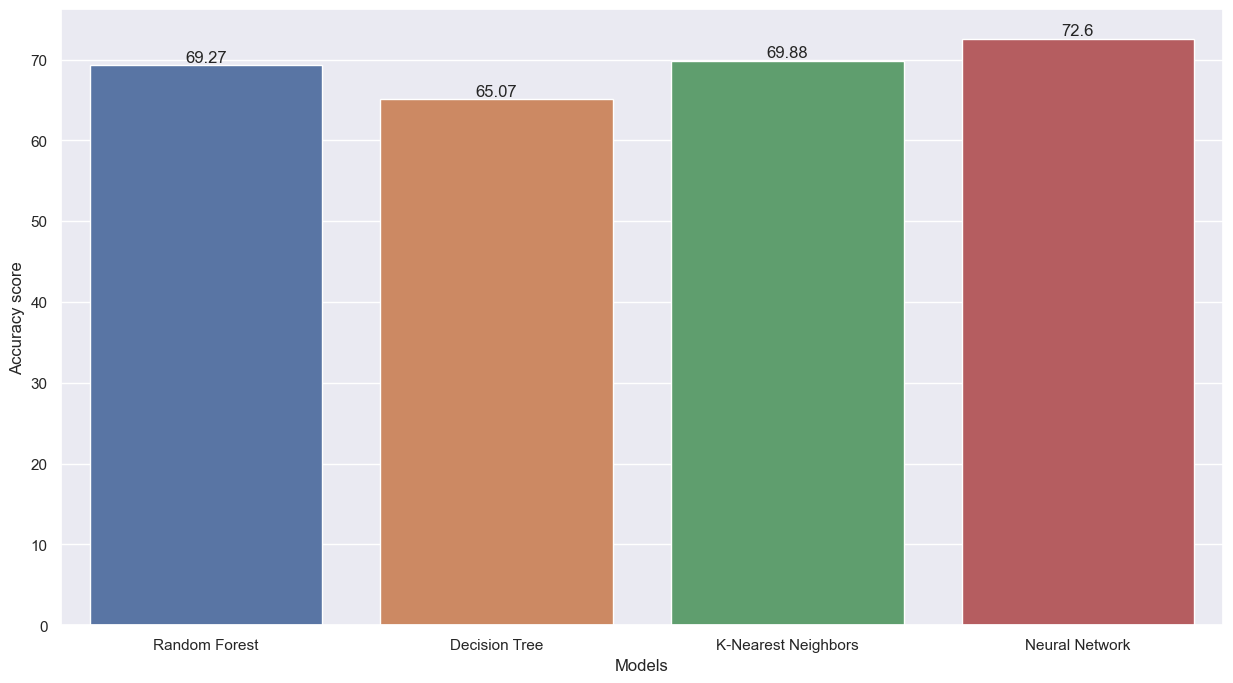

In [32]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Models")
plt.ylabel("Accuracy score")

barPlot = sns.barplot(x=models,y=scores)
for i in barPlot.containers:
    barPlot.bar_label(i,)